# Проект«Ненужные вещи» — ваши ненужные вещи нужны кому-то другому!

Поступила задача от продакт-менеджера команды: пользователи совершают много действий в приложении, и в этих данных есть инсайты, которые позволят нам улучшить приложение для продажи ненужных вещей.


 
По итогам исследования следует подготовить:

* презентацию

* и дашборд (Диаграмма распределения количества событий по типу события, с индикатор количества пользователей и фильтром дашборда по дате совершения события)



## Постановка задачи.

Конечным заказчиком результата является  продакт-менеджер. 

Результат исследования поможет:

* изучить поведение пользователей и адаптировать под их нужды работу приложения;

* Сформулировать новые гипотезы для проверки поведения пользователей. 

Следует выделить группы пользователей, которые различаются по метрикам:

1. retention rate,
2. время, проведённое в приложении, 
3. частота действий, 
4. конверсия в целевое действие — просмотр контактов.

Проверть статистические гипотезы:

    1. *Некоторые пользователи установили приложение по ссылке из `yandex`, другие — из `google`. Проверить гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.*
    2. *Пользователи, которые пользуются приложением часто, и те, кто пользуется приложением редко, демонстрируют разную конверсию в просмотры контактов.*

По итогам исследования подготовить презентацию в формате **pdf** .


# Знакомство с данными и предобработка.

## Загрузка необходимых для работы библиотек

In [1]:
# загрузим необходимые для работы библиотеки
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from plotly import graph_objects as go 
import plotly.express as px
from scipy import stats as st
import math as mth
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 

import itertools
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install openpyxl

## Загрузка данных

In [2]:
# предоставленные для анализа данные сохраним в переменных
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [3]:
# выведем на экран первые 5 строк датасета
display(mobile_sourсes.head())

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [4]:
# выведем на экран первые 5 строк датасета
display(mobile_dataset.head())

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


## Предобработка данных

In [5]:
# выведем общую информацию mobile_sourсes
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [6]:
# выведем общую информацию mobile_dataset
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [7]:
# переименуем  наименования колонок в переменной mobile_dataset
mobile_dataset.rename(columns = {'event.time' : 'event_time', 'event.name' : 'event_name', 'user.id': 'userId'}, inplace = True) 


In [8]:
# сохраним столбец event_time в формате времени
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'])
# отбросим микросекунды
mobile_dataset['event_time']= mobile_dataset['event_time'].dt.floor(freq='S')

In [9]:
# выведем общую информацию mobile_dataset для проверки типов данных
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   userId      74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [10]:
# выведем на экран первые 5 строк датасета
display(mobile_dataset.head())

,event_time,event_name,userId
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [11]:
# проверим дубликаты
mobile_dataset.duplicated().sum()

1143

In [12]:
# проверим дубликаты
mobile_sourсes.duplicated().sum()

0

In [13]:
# удалим дубликаты
mobile_dataset = mobile_dataset.drop_duplicates()
# проверим дубликаты
mobile_dataset.duplicated().sum()


0

* Предварительный вывод

в ходе предобработки установлено:

пропущенных значений в данных нет

дубликаты удалены.

Наименования колонок приведены к змеиному регистру.

Колонка с указанной датой event_time переведена в формат datetime64, микросекунды отброшены.

# Исследовательский анализ данных.

## Определить минимальную и максимальную даты.

In [14]:
# найдём максимальную и минимальную даты
print('Минимальная дата :',mobile_dataset['event_time'].min())
print('Максимальная дата :',mobile_dataset['event_time'].max())

Минимальная дата : 2019-10-07 00:00:00
Максимальная дата : 2019-11-03 23:58:12


## Определить количество событий.

In [15]:
# определим сколько всего событий в данных
pd.Series(mobile_dataset['event_name'].unique())

0       advert_open
1         tips_show
2               map
3     contacts_show
4          search_4
5          search_5
6        tips_click
7       photos_show
8          search_1
9          search_2
10         search_3
11    favorites_add
12    contacts_call
13         search_6
14         search_7
15    show_contacts
dtype: object

## Определить количество пользователей.

In [16]:
#определим сколько всего пользователей 
print('всего пользователей :',len(pd.Series(mobile_sourсes['userId'].unique())))

всего пользователей : 4293


## Построить гистограмму по дате.

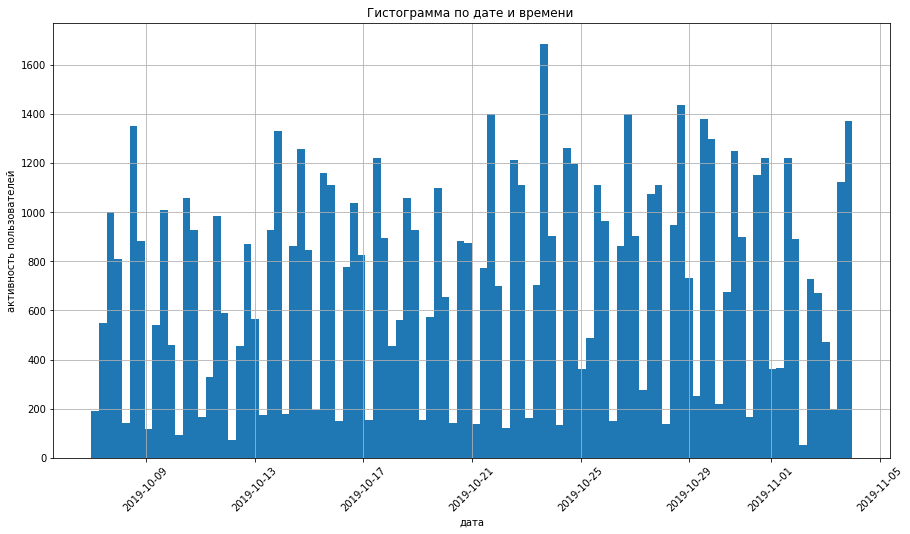

In [17]:
# посторим гистограмму по дате 
h = mobile_dataset['event_time'].hist(bins=100,figsize=(15,8))
fig = h.get_figure()
plt.xticks(rotation=45)
plt.title('Гистограмма по дате и времени ')
plt.xlabel("дата")
plt.ylabel("активность пользователей")
plt.show()

* Промежуточный вывод


Гистограмма активности пользователей  имеет пик 24.10.2019 - возможно  вышла реклама или сезонное колебание (можно уточнить у продакт-менеджеров ). В целом, в анализируемом периоде активность пользователей распределена равномерно и находится на довольно высоком (относительно ночного спада) уровне.

## Определить количество событий в среднем на пользователя.

In [18]:
#Посчитаем сколько в среднем событий приходится на пользователя
pd.pivot_table(mobile_dataset, values='event_name',index='userId',aggfunc={'event_name': 'count'})\
.reset_index().describe()

,event_name
count,4293.000000
mean,17.017004
std,28.597431
min,1.000000
25%,5.000000
50%,9.000000
75%,17.000000
max,470.000000


## Определить сколько раз пользователи совершали каждое событие.

In [19]:
# посчитаем количество операций в каждом событии
display(mobile_dataset.groupby(['event_name'])['userId'].count())#

event_name
advert_open       6146
contacts_call      534
contacts_show     4297
favorites_add     1414
map               3749
photos_show       9352
search_1          3488
search_2           324
search_3           521
search_4           701
search_5          1049
search_6           460
search_7           222
show_contacts       79
tips_click         811
tips_show        39907
Name: userId, dtype: int64



 * События contacts_show и show_contact объединены в contacts_show;
    
 * все события search объединены в одно search_7.   
    
    

In [20]:
# объединим события contacts_show и show_contacts
mobile_dataset['event_name']= mobile_dataset['event_name'].replace('show_contacts','contacts_show')
# объединим события search
mobile_dataset['event_name']= mobile_dataset['event_name']\
.replace({'search_1','search_2','search_3'},{'search_4','search_5','search_6'})\
.replace({'search_4','search_5'},{'search_6','search_7'}).replace('search_6','search_7')
# выведем на экран
display(mobile_dataset.groupby(['event_name'])['userId'].count())

event_name
advert_open       6146
contacts_call      534
contacts_show     4376
favorites_add     1414
map               3749
photos_show       9352
search_7          6765
tips_click         811
tips_show        39907
Name: userId, dtype: int64

В результете исследовательского анализа данных установлено:

* минимальная дата анализируемого периода - 2019-10-07, 
* максимальная дата анализируемого периода -2019-11-03;

* событие tips_show- самое много численное, пользователями не совершается, а является автоматическим и в некоторых пунтках анализа принимать участие не должно;

* всего пользователей : 4293;

* количество событий в среднем на пользователя -17;

* наиболшее количество раз совершалось событие photos_show, наименьшее количество раз - contacts_call- что иллюстрирует большую заинтересованность пользователей в фотографиях и низкую активность в звонке непосредственно из приложения.

В составе данных о событиях совершённых пользователями обнаружены идентичные и схожие по своей природе события, которые, для целей анализа, решено объединить между собой.Речь идёт о contacts_show и show_contact и событиях search. 
Гистограмма активности пользователей  даёт возможность сделать вывод о достаточно высокой активности  в течение анализируемого периода и небольшом пике активности 24.10.2019г. Причину пика следует уточнить у продакт- менеджера.


# Сегментирование пользователей на основе действий.


Перед сегментированием пользователей  выделим в данных пользовательские сессии. Размер сессий ограничим 30 минутами, т.к. это интуитивно достаточный период для пользования приложением по продаже ненужных вещей.  

In [21]:
# выделение сессий

g = (mobile_dataset.sort_values(['userId', 'event_time']).groupby('userId')['event_time']\
     .diff() > pd.Timedelta('30Min')).cumsum()
#создать счетчик групп
mobile_dataset['session_id'] = mobile_dataset.groupby(['userId', g], sort=False).ngroup() + 1
#  выведем основные показатели количества сессий
display (mobile_dataset.describe())

,session_id
count,73054.000000
mean,5008.486914
std,3054.556129
min,1.000000
25%,2239.000000
50%,5000.000000
75%,7641.000000
max,10368.000000


In [22]:
# добавим источник в данные пользователей
mobile_dataset_sourсes = mobile_dataset.merge(mobile_sourсes, how='left', on='userId')
display(mobile_dataset_sourсes.head())

,event_time,event_name,userId,session_id,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,1,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1,other
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,yandex
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1,other
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,yandex


При подготовке данных к кластеризации в зависимости от типа поведения, удалим из них событие tips_show как независящее от поведения пользователя.

In [23]:
# сохраним в переменной df_cluster сгруппированные для обработки данные

df_cluster = pd.pivot_table(mobile_dataset_sourсes, index='userId'\
                            ,columns=['event_name'],values='session_id',fill_value=0)\
.rename_axis(None, axis=1)

display(df_cluster.head())

,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search_7,tips_click,tips_show
userId,,,,,,,,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0.0,0.000000,0.000000,0.0,3572.333333,0.000000,0.000000,0.0,3158.482759
00157779-810c-4498-9e05-a1e9e3cedf93,7169.5,6026.400000,7126.545455,6415.5,0.000000,6452.424242,6586.777778,0.0,0.000000
00463033-5717-4bf1-91b4-09183923b9df,0.0,0.000000,0.000000,0.0,0.000000,9431.000000,0.000000,0.0,0.000000
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,7094.0,0.000000,0.000000,0.0,7126.000000,0.000000,6491.000000,0.0,6431.500000
00551e79-152e-4441-9cf7-565d7eb04090,0.0,7286.333333,7286.333333,0.0,0.000000,7979.000000,7661.000000,0.0,0.000000


## Проведём кластеризацию пользователей  в зависимости от типа поведения.

In [24]:
# создаём объект класса scaler (нормализатор)
scaler = StandardScaler() 

In [25]:
# сохраним в переменной  х данные без целевой переменной  и tips_show 
x = df_cluster.drop(['contacts_show','tips_show'], axis = 1)
display(x.head())

,advert_open,contacts_call,favorites_add,map,photos_show,search_7,tips_click
userId,,,,,,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0.0,0.000000,0.0,3572.333333,0.000000,0.000000,0.0
00157779-810c-4498-9e05-a1e9e3cedf93,7169.5,6026.400000,6415.5,0.000000,6452.424242,6586.777778,0.0
00463033-5717-4bf1-91b4-09183923b9df,0.0,0.000000,0.0,0.000000,9431.000000,0.000000,0.0
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,7094.0,0.000000,0.0,7126.000000,0.000000,6491.000000,0.0
00551e79-152e-4441-9cf7-565d7eb04090,0.0,7286.333333,0.0,0.000000,7979.000000,7661.000000,0.0


Для определения количества кластеров выведем дендрограмму

In [26]:
# обучаем нормализатор и преобразуем набор данных
x_sc = scaler.fit_transform(x)  
# выведем матрицу на экран
print(x_sc[:10]) 

[[-0.38293211 -0.19402471 -0.2569394   0.77680401 -0.4915753  -0.63785669
  -0.24172145]
 [ 2.73630768  4.48288363  3.59573696 -0.56557639  1.89479623  1.5085191
  -0.24172145]
 [-0.38293211 -0.19402471 -0.2569394  -0.56557639  2.9963959  -0.63785669
  -0.24172145]
 [ 2.70345984 -0.19402471 -0.2569394   2.11217003 -0.4915753   1.47730883
  -0.24172145]
 [-0.38293211  5.46068011 -0.2569394  -0.56557639  2.45938666  1.85856652
  -0.24172145]
 [-0.38293211 -0.19402471 -0.2569394  -0.56557639 -0.4915753   1.71160309
  -0.24172145]
 [-0.38293211 -0.19402471 -0.2569394  -0.56557639 -0.4915753  -0.63785669
  -0.24172145]
 [-0.38293211 -0.19402471 -0.2569394  -0.56557639  1.20229683 -0.63785669
  -0.24172145]
 [-0.38293211 -0.19402471 -0.2569394  -0.56557639 -0.30591508 -0.63785669
  -0.24172145]
 [-0.38293211 -0.19402471 -0.2569394  -0.56557639  0.12051168 -0.63785669
  -0.24172145]]


In [27]:
# в переменной linked сохраним таблицу «связок» 
linked = linkage(x_sc, method = 'ward')
#выведем матрицу
print(linked[:10])

[[6.000e+00 1.200e+01 0.000e+00 2.000e+00]
 [1.900e+01 4.293e+03 0.000e+00 3.000e+00]
 [2.000e+01 4.294e+03 0.000e+00 4.000e+00]
 [3.100e+01 4.295e+03 0.000e+00 5.000e+00]
 [3.800e+01 4.296e+03 0.000e+00 6.000e+00]
 [4.000e+01 4.297e+03 0.000e+00 7.000e+00]
 [5.000e+01 4.298e+03 0.000e+00 8.000e+00]
 [5.800e+01 4.299e+03 0.000e+00 9.000e+00]
 [6.500e+01 4.300e+03 0.000e+00 1.000e+01]
 [6.800e+01 4.301e+03 0.000e+00 1.100e+01]]


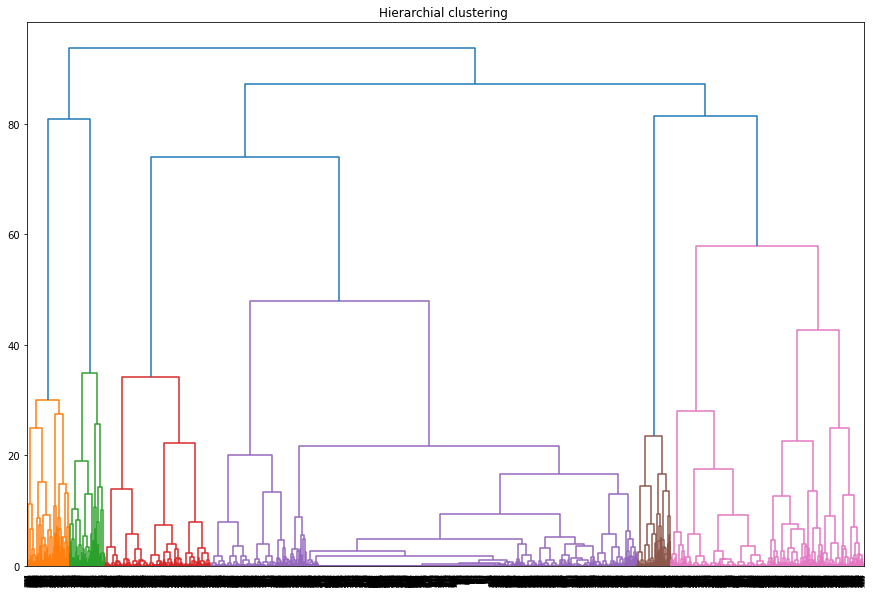

In [28]:
# отрисуем дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering ')
plt.show() 

Количество кластеров примем равным 6 .


 * Выше отрисована дендрограмма. По ней определила 6 пересечений на уровне показателя 60.  
 


In [29]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(df_cluster)

# задаём модель k_means с числом кластеров 6 и фиксируем значение random_state
km = KMeans(n_clusters=6, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 6)
labels =  km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
df_cluster['cluster'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
display(df_cluster.groupby('cluster').mean())



,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search_7,tips_click,tips_show
cluster,,,,,,,,,
0,1337.475859,0.000000,2612.900159,655.148647,2524.680791,117.018325,1566.950344,7270.933500,6275.595023
1,239.136829,37.469589,638.593549,68.618802,766.574077,169.905371,1157.741867,84.798549,3197.759219
2,760.809012,7051.056698,6943.919434,1322.595641,0.000000,5221.165346,3694.176646,0.000000,14.246154
3,29.216360,86.984535,1399.599859,64.931083,0.000000,6317.023450,3732.670318,6.365159,29.705360
4,4059.029616,0.000000,1319.031686,40.126097,6534.678143,11.849829,2741.873375,24.761945,6575.542489
5,2212.797684,38.672131,2138.834183,7096.290437,831.698928,4283.991938,4216.278968,86.530055,1773.522801


In [30]:
#  выведем количество  строк в кластерах
display(df_cluster.groupby('cluster').count())

,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search_7,tips_click,tips_show
cluster,,,,,,,,,
0,191,191,191,191,191,191,191,191,191
1,2606,2606,2606,2606,2606,2606,2606,2606,2606
2,130,130,130,130,130,130,130,130,130
3,597,597,597,597,597,597,597,597,597
4,586,586,586,586,586,586,586,586,586
5,183,183,183,183,183,183,183,183,183


* Промежуточный вывод

Кластеризация проведена методом KMeans. Количество кластеров - 6.

Поведение пользователей в кластерах имеют свои особенности, которые выражаются в средних показателях количества дейстыий в приложении. Самыми яркими поведенческими особенностями пользователей в кластерах являются:

* Кластер 0 - совершено максимальное количество действий tips_click (более 7000 раз);
* Кластер 1 - меньше всех осуществили действия search_7 (в среднем чуть более 1157);  
* Кластер 2 - максимальное количество действий contacts_call (более 7000 раз);
* Кластер 3 - максимальное количество действий photos_show (более 6000 раз);
* Кластер 4 - максимальное количество действий	advert_open и map (более 4000 и 6000 раз соответственно);
* Кластер 5 - максимальное количество действий favorites_add (более 7000 раз).

По результатам кластеризации можно определить, что основная аудитория попала в кластер 1 - более 60 %. Размеры остальных клатеров заметно меньше. Показатели поведения пользователей в этой группе очень низки.

## Исследуем, как группы пользователей,  различаются по метрикам:

1. retention rate,
2. время, проведённое в приложении, 
3. частота действий, 
4. конверсия в целевое действие — просмотр контактов.

In [31]:
# сохраним в переменной cluster_id
cluster_id = pd.pivot_table(df_cluster, values='cluster',index='userId').reset_index()
display(cluster_id.head())

,userId,cluster
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
1,00157779-810c-4498-9e05-a1e9e3cedf93,2
2,00463033-5717-4bf1-91b4-09183923b9df,3
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,4
4,00551e79-152e-4441-9cf7-565d7eb04090,2


In [32]:
# добавим к данным номер кластера
mobile_dataset_sourсes_cluster = mobile_dataset_sourсes.merge(cluster_id, how='left', on='userId')
# выведем на печать  первые 5 строк
display(mobile_dataset_sourсes_cluster.head())

,event_time,event_name,userId,session_id,source,cluster
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,yandex,1
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,yandex,1


In [33]:
# выведем количество пользователей в кластерах
mobile_dataset_sourсes_cluster.groupby('cluster').agg({'userId':'nunique'})

,userId
cluster,
0,191
1,2606
2,130
3,597
4,586
5,183


 **Исследуем как группы пользователей различаются по показателю retention rate.**

Для расчета  retention rate подготовим таблицу, добавив в mobile_dataset_sourсes_cluster колонку с датой первого события.

In [34]:
# создадим колонку с минимальной датой события
mobile_dataset_sourсes_cluster['min'] = mobile_dataset_sourсes_cluster.groupby('userId')['event_time'].transform('min')
# выведем на экран
display(mobile_dataset_sourсes_cluster.head())

,event_time,event_name,userId,session_id,source,cluster,min
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1,2019-10-07 00:00:00
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1,2019-10-07 00:00:00
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,yandex,1,2019-10-07 00:00:02
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1,2019-10-07 00:00:00
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,yandex,1,2019-10-07 00:00:02


In [35]:
# сохраним данные  кластера 0 в переменной retention_rate_0
retention_rate_0 = mobile_dataset_sourсes_cluster.query('cluster==0').copy()
display(retention_rate_0.head())


,event_time,event_name,userId,session_id,source,cluster,min
509,2019-10-07 11:39:42,map,cb36854f-570a-41f4-baa8-36680b396370,52,yandex,0,2019-10-07 11:39:42
511,2019-10-07 11:39:45,map,cb36854f-570a-41f4-baa8-36680b396370,52,yandex,0,2019-10-07 11:39:42
512,2019-10-07 11:39:46,map,cb36854f-570a-41f4-baa8-36680b396370,52,yandex,0,2019-10-07 11:39:42
513,2019-10-07 11:39:47,map,cb36854f-570a-41f4-baa8-36680b396370,52,yandex,0,2019-10-07 11:39:42
514,2019-10-07 11:39:48,map,cb36854f-570a-41f4-baa8-36680b396370,52,yandex,0,2019-10-07 11:39:42


Показатель retention rate кластера 0


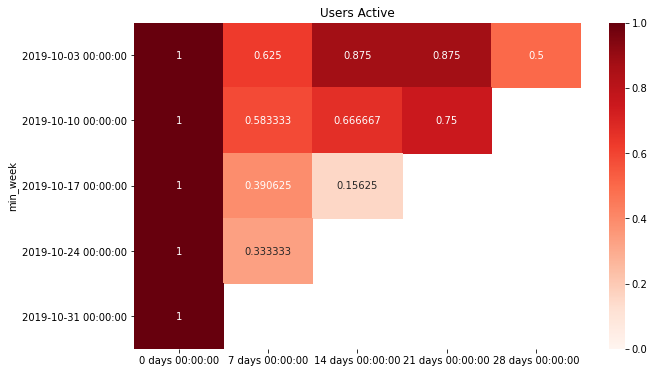

In [36]:
# создадим функцию по расчету удержания и отрисовке тепловой карты
def retention (retention_rate):
    df_rev = retention_rate
# здесь мы задаем текущую дату события в формате недели
    df_rev['active_date'] = df_rev['event_time'].astype('datetime64[W]')
    df_rev['min_week'] = df_rev['min'].astype('datetime64[W]')
    
# здесь рассчитываесмя lifetime события относительно первого захода пользователя
    df_rev['lifetime'] = df_rev['active_date'] - df_rev['min_week']
    
# строим таблицу удержания
    result_grouped = df_rev.pivot_table(
        index=['min_week'], columns='lifetime', values='userId', aggfunc='nunique'
    )
# вычисляем размеры когорт
    cohort_sizes = (
        df_rev.groupby('min_week')
        .agg({'userId': 'nunique'})
        .rename(columns={'userId': 'cohort_size'})
    )
# объединяем размеры когорт и таблицу удержания
    result_grouped = cohort_sizes.merge(
        result_grouped, on='min_week', how='left'
    )
# выводим результат 
    result_grouped
# делим данные таблицы удержания на размеры когорт (чтобы получить проценты)
    result_grouped = result_grouped.div(
        result_grouped['cohort_size'], axis=0
    ).drop(columns=['cohort_size'])
# выводим результат
    result_grouped
    
# отрисуем тепловую карту
    plt.figure(figsize=(10,6))
    plt.title('Users Active')
    ax = sns.heatmap(data=result_grouped, annot=True, vmin=0.0,cmap='Reds',fmt='g')
    ax.set_yticklabels(result_grouped.index)
    fig=ax.get_figure()
    

plt.show()
retention (retention_rate_0)
print('Показатель retention rate кластера 0')

In [37]:
# сохраним данные  кластера 1 в переменной retention_rate_1
retention_rate_1 = mobile_dataset_sourсes_cluster.query('cluster==1').copy()
display(retention_rate_1.head())


,event_time,event_name,userId,session_id,source,cluster,min
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1,2019-10-07 00:00:00
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1,2019-10-07 00:00:00
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,yandex,1,2019-10-07 00:00:02
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1,2019-10-07 00:00:00
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,yandex,1,2019-10-07 00:00:02


Показатель retention rate кластера 1


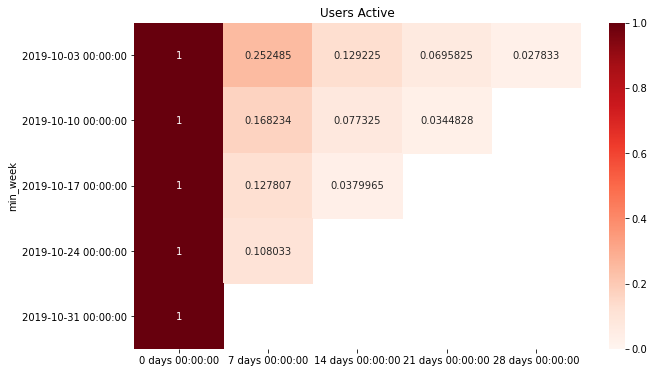

In [38]:
#  выведем  тепловую карту удержания по кластеру 1
retention (retention_rate_1)
print('Показатель retention rate кластера 1')

In [39]:
# сохраним данные  кластера 2 в переменной retention_rate_2
retention_rate_2 = mobile_dataset_sourсes_cluster.query('cluster==2').copy()
display(retention_rate_2.head())


,event_time,event_name,userId,session_id,source,cluster,min
2904,2019-10-08 11:31:11,photos_show,aa864e21-b0e5-4cb6-b316-1fea9f5a5f5d,311,yandex,2,2019-10-08 11:31:11
2914,2019-10-08 11:32:24,photos_show,aa864e21-b0e5-4cb6-b316-1fea9f5a5f5d,311,yandex,2,2019-10-08 11:31:11
3007,2019-10-08 11:54:35,photos_show,aa864e21-b0e5-4cb6-b316-1fea9f5a5f5d,311,yandex,2,2019-10-08 11:31:11
3014,2019-10-08 11:58:47,contacts_show,aa864e21-b0e5-4cb6-b316-1fea9f5a5f5d,311,yandex,2,2019-10-08 11:31:11
3080,2019-10-08 12:36:32,photos_show,66582665-95a6-42cc-ad71-7c3b9971bc64,334,other,2,2019-10-08 12:36:32


Показатель retention rate кластера 2


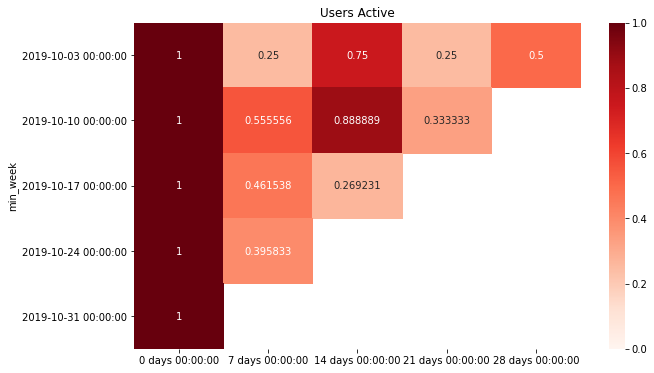

In [40]:
#  выведем  тепловую карту удержания по кластеру 2
retention (retention_rate_2)
print('Показатель retention rate кластера 2')

In [41]:
# сохраним данные  кластера 3 в переменной retention_rate_3
retention_rate_3 = mobile_dataset_sourсes_cluster.query('cluster==3').copy()
display(retention_rate_3.head())


,event_time,event_name,userId,session_id,source,cluster,min
255,2019-10-07 09:38:35,search_7,2b39c650-c582-4195-ba16-ade26ee0a72f,25,google,3,2019-10-07 09:38:35
259,2019-10-07 09:39:17,search_7,2b39c650-c582-4195-ba16-ade26ee0a72f,25,google,3,2019-10-07 09:38:35
607,2019-10-07 12:27:25,search_7,71a735e8-a704-4f79-a88e-ce0cfc5782c4,62,other,3,2019-10-07 12:27:25
612,2019-10-07 12:31:18,photos_show,71a735e8-a704-4f79-a88e-ce0cfc5782c4,62,other,3,2019-10-07 12:27:25
906,2019-10-07 14:32:55,photos_show,c21daf1f-e787-4a5c-9d92-62cd3dafc9b3,99,yandex,3,2019-10-07 14:32:55


Показатель retention rate кластера 3


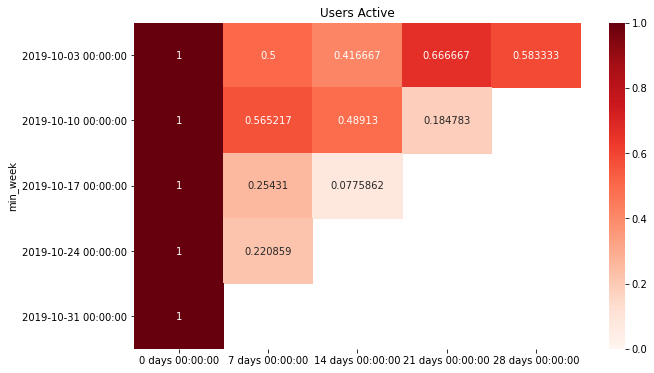

In [42]:
#  выведем  тепловую карту удержания по кластеру 3
retention (retention_rate_3)
print('Показатель retention rate кластера 3')

In [43]:
# сохраним данные  кластера 4 в переменной retention_rate_4
retention_rate_4 = mobile_dataset_sourсes_cluster.query('cluster==4').copy()
display(retention_rate_4.head())


,event_time,event_name,userId,session_id,source,cluster,min
207,2019-10-07 09:00:21,tips_show,c9c9f6dd-6741-474d-a75b-2334f735f52f,14,other,4,2019-10-07 09:00:21
210,2019-10-07 09:02:57,tips_show,c9c9f6dd-6741-474d-a75b-2334f735f52f,14,other,4,2019-10-07 09:00:21
211,2019-10-07 09:05:05,tips_click,c9c9f6dd-6741-474d-a75b-2334f735f52f,14,other,4,2019-10-07 09:00:21
212,2019-10-07 09:05:17,tips_show,c9c9f6dd-6741-474d-a75b-2334f735f52f,14,other,4,2019-10-07 09:00:21
213,2019-10-07 09:08:09,tips_show,c9c9f6dd-6741-474d-a75b-2334f735f52f,14,other,4,2019-10-07 09:00:21


Показатель retention rate кластера 4


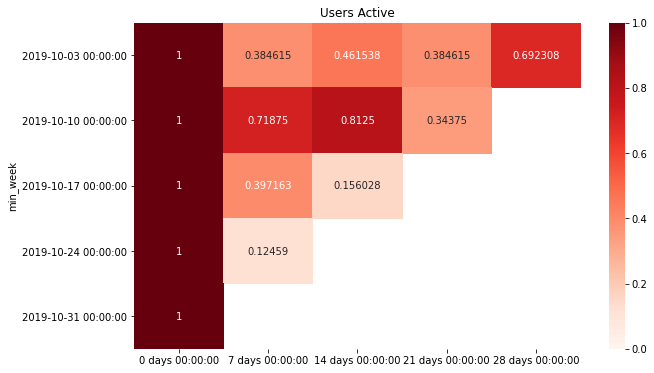

In [44]:
#  выведем  тепловую карту удержания по кластеру 4
retention (retention_rate_4)
print('Показатель retention rate кластера 4')

In [45]:
# сохраним данные  кластера 5 в переменной retention_rate_5
retention_rate_5 = mobile_dataset_sourсes_cluster.query('cluster==5').copy()
display(retention_rate_5.head())


,event_time,event_name,userId,session_id,source,cluster,min
701,2019-10-07 13:18:32,tips_show,593f807c-87d3-49c7-821b-bbe93d797c22,74,yandex,5,2019-10-07 13:18:32
702,2019-10-07 13:18:33,tips_show,593f807c-87d3-49c7-821b-bbe93d797c22,74,yandex,5,2019-10-07 13:18:32
741,2019-10-07 13:26:23,tips_show,593f807c-87d3-49c7-821b-bbe93d797c22,74,yandex,5,2019-10-07 13:18:32
744,2019-10-07 13:27:29,tips_show,593f807c-87d3-49c7-821b-bbe93d797c22,74,yandex,5,2019-10-07 13:18:32
751,2019-10-07 13:28:29,tips_show,593f807c-87d3-49c7-821b-bbe93d797c22,74,yandex,5,2019-10-07 13:18:32


Показатель retention rate кластера 5


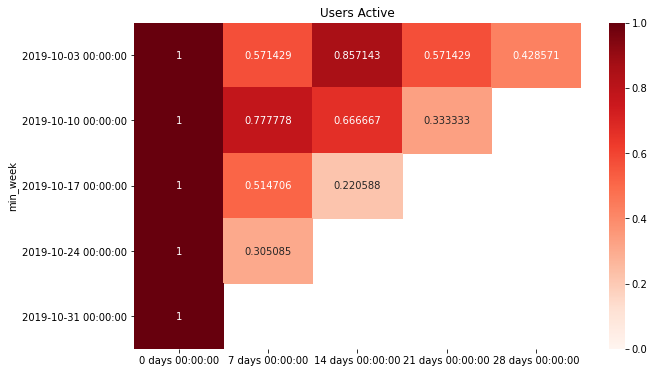

In [46]:
#  выведем  тепловую карту удержания по кластеру 5
retention (retention_rate_5)
print('Показатель retention rate кластера 5')

* Промежуточный вывод

Показатели удержания retention rate:

наиболее высокие достигнуты в кластере  4 (0,7);

самые низкие показатели в кластере 1 (0,02) - самом многочисленном.


**Анализ времени , проведённого в приложении в разрезе кластеров**

In [53]:
# для расчета времени использования приложения сохраним  в переменной session необходимые  данные
session = mobile_dataset_sourсes_cluster.copy()
# группируем по кластерам, пользователям и сессиям

first_session_event = (session.groupby(['cluster','userId', 'session_id'], as_index=False)
                           .agg(first_event_time=('event_time', 'min')))

# объединяем датасеты в переменной session_time
session_time = first_session_event.merge(last_session_event, on=['cluster','userId', 'session_id'], how='left')
# выведем на экран первые 5 строк
display(session_time.head())

,cluster,userId,session_id,first_event_time,last_event_time
0,0,01147bf8-cd48-49c0-a5af-3f6eb45f8262,9625,2019-11-01 21:13:53,2019-11-01 22:23:01
1,0,01b4ca51-930d-4518-aa09-8a8c35e1d9cc,5075,2019-10-22 11:05:05,2019-10-22 11:22:20
2,0,034a556c-8837-4c78-8012-795e03764657,10196,2019-11-03 16:48:43,2019-11-03 17:05:31
3,0,04ee0c31-3c77-49f8-81d2-bbfe9fe2cde8,5676,2019-10-23 16:08:52,2019-10-23 16:14:38
4,0,0656a1d1-9032-43ae-b936-11e41526eeff,7362,2019-10-27 18:48:21,2019-10-27 18:56:04


In [54]:
# сохраним в колонке user_time общее время пользования приложением
session_time['user_time'] = session_time['last_event_time'] - session_time['first_event_time']
# выведем на экран первые 5 строк
display(session_time.head())


,cluster,userId,session_id,first_event_time,last_event_time,user_time
0,0,01147bf8-cd48-49c0-a5af-3f6eb45f8262,9625,2019-11-01 21:13:53,2019-11-01 22:23:01,0 days 01:09:08
1,0,01b4ca51-930d-4518-aa09-8a8c35e1d9cc,5075,2019-10-22 11:05:05,2019-10-22 11:22:20,0 days 00:17:15
2,0,034a556c-8837-4c78-8012-795e03764657,10196,2019-11-03 16:48:43,2019-11-03 17:05:31,0 days 00:16:48
3,0,04ee0c31-3c77-49f8-81d2-bbfe9fe2cde8,5676,2019-10-23 16:08:52,2019-10-23 16:14:38,0 days 00:05:46
4,0,0656a1d1-9032-43ae-b936-11e41526eeff,7362,2019-10-27 18:48:21,2019-10-27 18:56:04,0 days 00:07:43


In [55]:
# выведем на экран средние значения времени пользования приложением в кластерах
session_time_mean = session_time.groupby('cluster').agg({'user_time': 'mean'}).sort_values(by='user_time', ascending=False)
display('Средние значения времени пользования приложением в кластерах ')
display(session_time_mean)

'Средние значения времени пользования приложением в кластерах '

,user_time
cluster,
0,0 days 00:20:48.293251533
4,0 days 00:15:18.573285198
1,0 days 00:12:54.730264446
5,0 days 00:11:58.229563269
2,0 days 00:08:56.428327645
3,0 days 00:08:31.847222222


* Промежуточный вывод

Среднее время пользования приложением в кластерах не превышает 21 минуты и не ниже 8 минут:

* наибольшее среднее время пользования приложением показали пользователи кластера 0- более 20 минут;

* наименьшее среднее время пользования приложением - у пользователей кластера 3 - чуть более 8 минут.

**Исследуем, как группы пользователей различаются по частоте действий.**


In [59]:
# выделяем данные кластера 0
frequency_0 = mobile_dataset_sourсes_cluster.query('cluster == 0')

# считаем количество каждого действия
frequency_0_event_count = (frequency_0.groupby('event_name', as_index=False)
                      .agg(event_count=('event_name', 'count'))
                      .sort_values(by='event_count', ascending=False))
# считаем частоту данного события

frequency_0_event_count['freq'] = round(frequency_0_event_count['event_count']/frequency_0_event_count['event_count'].sum(), 3)
# выведем на экран
print()
display('Частота событий в кластере 0',frequency_0_event_count)

'Частота событий в кластере 0'

,event_name,event_count,freq
7,tips_show,5361,0.701
1,contacts_show,677,0.088
6,tips_click,498,0.065
0,advert_open,390,0.051
3,map,378,0.049
5,search_7,227,0.030
2,favorites_add,112,0.015
4,photos_show,7,0.001


In [60]:
# выделяем данные кластера 1
frequency_1 = mobile_dataset_sourсes_cluster.query('cluster == 1')

# считаем количество каждого действия
frequency_1_event_count = (frequency_1.groupby('event_name', as_index=False)
                      .agg(event_count=('event_name', 'count'))
                      .sort_values(by='event_count', ascending=False))
# считаем частоту данного события

frequency_1_event_count['freq'] = round(frequency_1_event_count['event_count']/frequency_1_event_count['event_count'].sum(), 3)
# выведем на экран
print()
display('Частота событий в кластере 1',frequency_1_event_count)

'Частота событий в кластере 1'

,event_name,event_count,freq
8,tips_show,24578,0.665
6,search_7,3033,0.082
0,advert_open,2324,0.063
5,photos_show,2261,0.061
2,contacts_show,2004,0.054
4,map,1957,0.053
3,favorites_add,399,0.011
7,tips_click,292,0.008
1,contacts_call,126,0.003


In [61]:
# выделяем данные кластера 2
frequency_2 = mobile_dataset_sourсes_cluster.query('cluster == 2')

# считаем количество каждого действия
frequency_2_event_count = (frequency_2.groupby('event_name', as_index=False)
                      .agg(event_count=('event_name', 'count'))
                      .sort_values(by='event_count', ascending=False))
# считаем частоту данного события

frequency_2_event_count['freq'] = round(frequency_2_event_count['event_count']/frequency_2_event_count['event_count'].sum(), 3)
# выведем на экран
print()
display('Частота событий в кластере 2',frequency_2_event_count)

'Частота событий в кластере 2'

,event_name,event_count,freq
4,photos_show,1166,0.422
2,contacts_show,579,0.209
5,search_7,520,0.188
1,contacts_call,346,0.125
3,favorites_add,84,0.030
0,advert_open,69,0.025
6,tips_show,1,0.000


In [62]:
# выделяем данные кластера 3
frequency_3 = mobile_dataset_sourсes_cluster.query('cluster == 3')

# считаем количество каждого действия
frequency_3_event_count = (frequency_3.groupby('event_name', as_index=False)
                      .agg(event_count=('event_name', 'count'))
                      .sort_values(by='event_count', ascending=False))
# считаем частоту данного события

frequency_3_event_count['freq'] = round(frequency_3_event_count['event_count']/frequency_3_event_count['event_count'].sum(), 3)
# выведем на экран
print()
display('Частота событий в кластере 3',frequency_3_event_count)

'Частота событий в кластере 3'

,event_name,event_count,freq
4,photos_show,4400,0.681
5,search_7,1503,0.232
2,contacts_show,403,0.062
3,favorites_add,70,0.011
1,contacts_call,58,0.009
7,tips_show,21,0.003
0,advert_open,9,0.001
6,tips_click,1,0.000


In [63]:
# выделяем данные кластера 4
frequency_4 = mobile_dataset_sourсes_cluster.query('cluster == 4')

# считаем количество каждого действия
frequency_4_event_count = (frequency_4.groupby('event_name', as_index=False)
                      .agg(event_count=('event_name', 'count'))
                      .sort_values(by='event_count', ascending=False))
# считаем частоту данного события

frequency_4_event_count['freq'] = round(frequency_4_event_count['event_count']/frequency_4_event_count['event_count'].sum(), 3)
# выведем на экран
print()
display('Частота событий в кластере 4',frequency_4_event_count)

'Частота событий в кластере 4'

,event_name,event_count,freq
7,tips_show,7955,0.588
0,advert_open,2833,0.209
3,map,1260,0.093
5,search_7,882,0.065
1,contacts_show,527,0.039
2,favorites_add,58,0.004
6,tips_click,10,0.001
4,photos_show,1,0.000


In [64]:
# выделяем данные кластера 5
frequency_5 = mobile_dataset_sourсes_cluster.query('cluster == 5')

# считаем количество каждого действия
frequency_5_event_count = (frequency_5.groupby('event_name', as_index=False)
                      .agg(event_count=('event_name', 'count'))
                      .sort_values(by='event_count', ascending=False))
# считаем частоту данного события

frequency_5_event_count['freq'] = round(frequency_5_event_count['event_count']/frequency_5_event_count['event_count'].sum(), 3)
# выведем на экран
print()
display('Частота событий в кластере 5',frequency_5_event_count)

'Частота событий в кластере 5'

,event_name,event_count,freq
8,tips_show,1991,0.351
5,photos_show,1517,0.267
3,favorites_add,691,0.122
6,search_7,600,0.106
0,advert_open,521,0.092
2,contacts_show,186,0.033
4,map,154,0.027
7,tips_click,10,0.002
1,contacts_call,4,0.001


* Промежуточный вывод

 При анализе частоты событий в кластерах, обращает на себя внимание тот факт, что список событий в кластерах не одинаков. Все 9 событий имеют место лишь в кластерах 1 и 5, кластеры 0 (нет события tips_click),3(нет события map) и 4(нет события contacts_call) совершали 8 событий и лишь 7 событий содержит кластер 2(нет события tips_click и map).  
 
 Краткая харрактеристика частот в кластерах:
 
 * Кластер 0 : самое частое событие - tips_show	(0,7), частота остальных событий на порядок ниже от 0,09 до 0;
 
 * Кластер 1 : самое частое событие - tips_show	(0,7), частота остальных событий тоже на порядок ниже от 0,08 до 0;
 
 * Кластер 2 : самое частое событие - photos_show	(0,4), частота contacts_show и search_7 - 0,2, остальные событий имеют частоту ниже 0,1 до 0;
 
 * Кластер 3 : самое частое событие - photos_show	(0,7),  остальные событий имеют частоту ниже 0,2 до 0;
 
 * Кластер 4 : самое частое событие - tips_show	(0,6), частота advert_open составляе 0,2, остальные событий имеют частоту ниже 0,06 до 0;
 
 * Кластер 5 : самое частое событие - tips_show и photos_show(0,3),  остальные событий имеют частоту ниже 0,1 до 0.
 
 Не зависящее от пользователя и самое частое событие tips_show не всегда возглавляет топ событий. Примером служат пользователи кластеров 2 и 3 - возможно, в них вошли любители фотографий.Этот факт нуждается в дополнительной проверке.  На одно событие tips_show приходится более 200 событий photos_show.  



**Расчитаем показатель конверсии в кластерах.**

---

In [65]:
#сохраним количество пользователей,совершивших целевое действие в кластерах в переменной conversion_cluster
conversion_cluster = pd.pivot_table(mobile_dataset_sourсes_cluster\
                                    .query('event_name=="contacts_show"')\
                                    ,index='cluster', values= ['userId'],aggfunc= {'userId':'nunique'})
# выведем на экран
print('Совершили целевое действие в кластерах',conversion_cluster)

Совершили целевое действие в кластерах          userId
cluster        
0            68
1           480
2           130
3           135
4           110
5            58


In [66]:
# посчитаем конверсию в просмотр контактов
conversion_cluster['conversion'] = conversion_cluster['userId']/mobile_dataset_sourсes_cluster\
.groupby('cluster')['userId'].nunique()


# выведем на экран
print(conversion_cluster.sort_values(by='conversion', ascending=False))

         userId  conversion
cluster                    
2           130    1.000000
0            68    0.356021
5            58    0.316940
3           135    0.226131
4           110    0.187713
1           480    0.184190


In [67]:
# выведем количество пользователей
len(pd.Series(mobile_dataset_sourсes_cluster['userId'].unique()))
mobile_dataset_sourсes_cluster.groupby('cluster')['userId']\
.nunique()

cluster
0     191
1    2606
2     130
3     597
4     586
5     183
Name: userId, dtype: int64

* Промежуточный вывод

Анализ показателей конверсии показал, что разброс значений  довольно большой: от 100% до 18%. 

Показатель конверсии 100% в кластере 2 является неправдоподобно высоким и этот факт нуждается в дополнительной проверке данных.
самый низкий показатель конверсии (он же и наиболее правдоподобный) в кластере 1 - самом многочисленном кластере.

* Промежуточный вывод 


  * самый высокий показатель конверсии  в кластере 2 (100 %),
  
  * самый низкий показатель конверсии в кластере 1 -  (18.4%).

**Определим как различается время между распространенными событиями пользователей из разных групп. Для анализа выберем событие advert_open и contacts_show.**

In [69]:
# создадим список сессий с событием advert_open
advert_open_session = mobile_dataset_sourсes_cluster.copy().query('event_name == "advert_open"')['session_id'].unique()
# сохраним в переменной mobile_dataset_advert_open_session сессии с событием advert_open
mobile_dataset_advert_open_session =  mobile_dataset_sourсes_cluster.query('session_id in @advert_open_session')
# создадим список сессий с событиями advert_open и contacts_show
advert_open_contacts_show_session = mobile_dataset_advert_open_session.query('event_name == "contacts_show"')['session_id']\
.unique()
# сохраним в переменной mobile_dataset_advert_open_contacts_show_session сессии с событием advert_open и contacts_show
mobile_dataset_advert_open_contacts_show_session = mobile_dataset_sourсes_cluster\
.query('session_id in @advert_open_contacts_show_session')
# сохраним в переменной first_advert_open_session первую дату событий advert_open в отобранных сессиях
first_advert_open_session =  (mobile_dataset_advert_open_contacts_show_session.query('event_name == "advert_open"')\
                              .groupby(['cluster','userId', 'session_id'], as_index=False)
                           .agg(first_advert_open=('event_time', 'min')))
# сохраним в переменной first_contacts_show_session первую дату событий contacts_show в отобранных сессиях 
first_contacts_show_session =  (mobile_dataset_advert_open_contacts_show_session.query('event_name == "contacts_show"')\
                                .groupby(['cluster','userId', 'session_id'], as_index=False)
                           .agg(first_contacts_show=('event_time', 'min')))
# в переменной session_events_group соединим полученные даты событий  
session_events_group = first_advert_open_session.merge(first_contacts_show_session\
                                                       ,on=['cluster','userId', 'session_id'], how='left')
# сохраним в колонке time_between разницу между датами событий
session_events_group['time_between']=session_events_group['first_advert_open']-session_events_group['first_contacts_show']
# избавимся от отрицательных значений в полученных данных
session_events_group = session_events_group.query('time_between>="0"')
# найдём и сохраним в переменной session_events_group_mean средние значения времени  между событиями в кластерах
session_events_group_mean = session_events_group.groupby('cluster').agg({'time_between': 'mean'})\
.sort_values(by='time_between', ascending=False)
# выведем на экран
session_events_group_mean

,time_between
cluster,
0,0 days 00:42:28.166666666
3,0 days 00:39:31
2,0 days 00:26:40
5,0 days 00:21:24.285714285
1,0 days 00:14:33.090909090
4,0 days 00:10:30.222222222


* Промежуточный вывод

В результате анализа среднего времени между событиями  advert_open и  contacts_show в группах пользователей установлено, что среднее время ограничено промежутком от 10 минут до 42минут:

* наибольший промежуток времени зафиксирован среди пользователей кластера 0 - более 42 минут;

* наименьший промежуток времени зафиксирован среди пользователей кластера 4 - чуть более 10 минут.



#  Проверим статистические гипотезы
    

## Гипотеза 1. *Некоторые пользователи установили приложение по ссылке из `yandex`, другие — из `google`. Проверим гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.*

* Гипотеза НО - конверсия в группах пользователей установивших приложение по ссылке из yandex и по ссылке из google - одинакова

* Гипотеза Н1 - конверсия в группах пользователей установивших приложение по ссылке из yandex и по ссылке из google  -различна

In [70]:
# сохраним в переменной yandex группу пользователей установивших приложение по ссылке из yandex
yandex = mobile_dataset_sourсes_cluster.query('source=="yandex"')

print(yandex.head())

            event_time   event_name                                userId  \
2  2019-10-07 00:00:02    tips_show  cf7eda61-9349-469f-ac27-e5b6f5ec475c   
4  2019-10-07 00:00:56  advert_open  cf7eda61-9349-469f-ac27-e5b6f5ec475c   
5  2019-10-07 00:01:19    tips_show  cf7eda61-9349-469f-ac27-e5b6f5ec475c   
8  2019-10-07 00:01:49  advert_open  cf7eda61-9349-469f-ac27-e5b6f5ec475c   
11 2019-10-07 00:02:06    tips_show  cf7eda61-9349-469f-ac27-e5b6f5ec475c   

    session_id  source  cluster                 min  
2            2  yandex        1 2019-10-07 00:00:02  
4            2  yandex        1 2019-10-07 00:00:02  
5            2  yandex        1 2019-10-07 00:00:02  
8            2  yandex        1 2019-10-07 00:00:02  
11           2  yandex        1 2019-10-07 00:00:02  


In [71]:
# сохраним в переменной google группу пользователей установивших приложение по ссылке из google
google = mobile_dataset_sourсes_cluster.query('source=="google"')
print(google.head())

            event_time event_name                                userId  \
37 2019-10-07 00:09:33  tips_show  f32e1e2a-3027-4693-b793-b7b3ff274439   
44 2019-10-07 00:11:48  tips_show  f32e1e2a-3027-4693-b793-b7b3ff274439   
49 2019-10-07 00:13:34  tips_show  f32e1e2a-3027-4693-b793-b7b3ff274439   
50 2019-10-07 00:13:45  tips_show  f32e1e2a-3027-4693-b793-b7b3ff274439   
57 2019-10-07 00:15:03  tips_show  f32e1e2a-3027-4693-b793-b7b3ff274439   

    session_id  source  cluster                 min  
37           5  google        1 2019-10-07 00:09:33  
44           5  google        1 2019-10-07 00:09:33  
49           5  google        1 2019-10-07 00:09:33  
50           5  google        1 2019-10-07 00:09:33  
57           5  google        1 2019-10-07 00:09:33  


In [72]:
# сохраним данные для анализа в переменной sample_yandex
sample_yandex = pd.pivot_table(yandex.query('event_name=="contacts_show"')\
                                    ,index='event_name', values= ['userId'],aggfunc= {'userId':'nunique'})\
.reset_index()
print(sample_yandex)

      event_name  userId
0  contacts_show     478


In [73]:
# сохраним данные для анализа в переменной sample_google
sample_google = pd.pivot_table(google.query('event_name=="contacts_show"')\
                                    ,index='event_name', values= ['userId'],aggfunc= {'userId':'nunique'})\
.reset_index()
print(sample_google)


      event_name  userId
0  contacts_show     275


In [74]:
# посчитаем количество уникальных пользователей в группах пользователей установивших приложение по 
#ссылке из yandex
display('Количество уникальных пользователей в группах пользователей установивших приложение по\
ссылке из yandex',len(pd.Series(yandex['userId'].unique())))

'Количество уникальных пользователей в группах пользователей установивших приложение поссылке из yandex'

1934

In [75]:
# посчитаем количество уникальных пользователей в группах пользователей установивших приложение по 
#ссылке из google
display('Количество уникальных пользователей в группах пользователей установивших приложение по\
ссылке из google',len(pd.Series(google['userId'].unique())))

'Количество уникальных пользователей в группах пользователей установивших приложение поссылке из google'

1129

In [76]:
# посчитаем пользователей совершивших целевое действие
action = np.array([sample_yandex.loc[0,'userId']
                  ,sample_google.loc[0,'userId']]) 
# выведем на экран
print(action)

[478 275]


In [77]:
#общее количество пользователей
total_quant = np.array([len(pd.Series(yandex['userId'].unique())),len(pd.Series(google['userId'].unique()))])

# выведем на экран
print(total_quant)

[1934 1129]


Мы выбрали для исследования статистически значимой разницы между конверсиями Z-тест .



In [78]:
alpha = .05 # критический уровень статистической значимости
# запишем дальнейший код в функцию
def z_test(action,total_quant,alpha):
    
# пропорция действия в первой группе:
    p1 = action[0]/total_quant[0]

# пропорция действия во второй группе:
    p2 = action[1]/total_quant[1]

# пропорция действия в комбинированном датасете:
    p_combined = (action[0] + action[1]) / (total_quant[0] + total_quant[1])

# разница пропорций в датасетах
    difference = p1 - p2 

#считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total_quant[0] + 1/total_quant[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 

# считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / total_quant[0] + 1 / total_quant[1])
    )

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными'
        ) 
z_test(action,total_quant,alpha)

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными


## Гипотеза 2. *Пользователи, которые пользуются приложением часто, и те, кто пользуется приложением редко, демонстрируют разную конверсию в просмотры контактов.*

* Гипотеза НО - конверсия в группах пользователей пользующихся приложением часто, и те, кто пользуется приложением редко - одинакова

* Гипотеза Н1 - конверсия в группах пользователей пользующихся приложением часто, и те, кто пользуется приложением редко  -различна

In [79]:
# сохраним количество сессий в переменной 
session = mobile_dataset_sourсes_cluster.groupby('userId')['session_id'].count().reset_index()\
.rename(columns={'session_id': 'session_count'})
# выведем на экран
print(session.head())
# создадим столбец session_count в mobile_dataset_sourсes_cluster
mobile_dataset_sourсes_cluster_session = mobile_dataset_sourсes_cluster.merge(session,  how='left', on= 'userId')
# выведем на экран
display(mobile_dataset_sourсes_cluster_session.head())

                                 userId  session_count
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349             35
1  00157779-810c-4498-9e05-a1e9e3cedf93             71
2  00463033-5717-4bf1-91b4-09183923b9df             10
3  004690c3-5a84-4bb7-a8af-e0c8f8fca64e             32
4  00551e79-152e-4441-9cf7-565d7eb04090              8


,event_time,event_name,userId,session_id,source,cluster,min,session_count
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1,2019-10-07 00:00:00,28
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1,2019-10-07 00:00:00,28
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,yandex,1,2019-10-07 00:00:02,93
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1,2019-10-07 00:00:00,28
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,yandex,1,2019-10-07 00:00:02,93


In [80]:
# определим  порог для пользователей пользующихся приложением часто более 17
often =mobile_dataset_sourсes_cluster_session.query('session_count>17')
display(often.head())

,event_time,event_name,userId,session_id,source,cluster,min,session_count
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1,2019-10-07 00:00:00,28
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1,2019-10-07 00:00:00,28
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,yandex,1,2019-10-07 00:00:02,93
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,1,other,1,2019-10-07 00:00:00,28
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2,yandex,1,2019-10-07 00:00:02,93


In [81]:
# определим  порог для пользователей пользующихся приложением редко менее или равно 17
rarely =  mobile_dataset_sourсes_cluster_session.query('session_count<=17')
print(rarely.head())

             event_time   event_name                                userId  \
25  2019-10-07 00:05:20     search_7  d9b06b47-0f36-419b-bbb0-3533e582a6cb   
26  2019-10-07 00:05:23     search_7  d9b06b47-0f36-419b-bbb0-3533e582a6cb   
144 2019-10-07 03:19:39    tips_show  57321726-5d66-4d51-84f4-c797c35dcf2b   
191 2019-10-07 08:02:57  photos_show  48e614d6-fe03-40f7-bf9e-4c4f61c19f64   
192 2019-10-07 08:08:29  photos_show  48e614d6-fe03-40f7-bf9e-4c4f61c19f64   

     session_id  source  cluster                 min  session_count  
25            4   other        1 2019-10-07 00:05:20              8  
26            4   other        1 2019-10-07 00:05:20              8  
144           9  google        1 2019-10-07 03:19:39              6  
191          11  yandex        1 2019-10-07 08:02:57              5  
192          11  yandex        1 2019-10-07 08:02:57              5  


In [82]:
# сохраним данные для анализа в переменной sample_often
sample_often = pd.pivot_table(often.query('event_name=="contacts_show"')\
                                    ,index='event_name', values= ['userId'],aggfunc= {'userId':'nunique'})\
.reset_index()
print(sample_often)

      event_name  userId
0  contacts_show     368


In [83]:
# сохраним данные для анализа в переменной sample_rarely
sample_rarely = pd.pivot_table(rarely.query('event_name=="contacts_show"')\
                                    ,index='event_name', values= ['userId'],aggfunc= {'userId':'nunique'})\
.reset_index()
print(sample_rarely)

      event_name  userId
0  contacts_show     613


In [84]:
# посчитаем количество уникальных пользователей в группах пользующихся приложением часто

display('Количество уникальных пользователей в группах пользующихся приложением часто',\
        len(pd.Series(often['userId'].unique())))

'Количество уникальных пользователей в группах пользующихся приложением часто'

1034

In [85]:
# посчитаем количество уникальных пользователей в группах пользующихся приложением редко

display('Количество уникальных пользователей в группах пользующихся приложением редко',\
        len(pd.Series(rarely['userId'].unique())))

'Количество уникальных пользователей в группах пользующихся приложением редко'

3259

In [86]:
# посчитаем пользователей совершивших целевое действие
action = np.array([sample_often.loc[0,'userId'],sample_rarely.loc[0,'userId']]) # совершили действие
# выведем на экран
print(action)

[368 613]


In [87]:
#общее количество пользователей
total_quant = np.array([len(pd.Series(often['userId'].unique())),len(pd.Series(rarely['userId'].unique()))])

# выведем на экран
print(total_quant)

[1034 3259]


In [88]:
alpha = .05 # критический уровень статистической значимости

z_test(action,total_quant,alpha)

p-значение:  0.0
Отвергаем нулевую гипотезу: между выборками есть значимая разница


* Промежуточный вывод

* Гипотеза 1 о том, что пользователи, установившие приложение по ссылке из yandex и другие, по ссылке из google, демонстрируют одинаковую конверсию в просмотры контактов, подтвердилась. Отвергаем альтернативную гипотезу.

* Гипотеза 2 о том, что пользователи, которые пользуются приложением часто, и те, кто пользуется приложением редко, демонстрируют одинаковую конверсию в просмотры контактов  не подтвердилась.Принимаем альтернативную гипотезу.



# Общий вывод.

## Вывод по разделу предобработки.


В результете предобработки установлено:

пропущенных значений в данных нет

данные о событиях не позволяют полностью выстроить воронку событий;

дубликаты удалены.

Наименования колонок приведены к змеиному регистру.

Колонка с указанной датой event_time переведена в формат datetime64, микросекунды отброшены.

## Вывод по разделу исследовательского анализа данных.


В результете исследовательского анализа данных установлено:

* минимальная дата анализируемого периода - 2019-10-07, 
* максимальная дата анализируемого периода -2019-11-03;

* количество событий составляет 9;

* всего пользователей : 4293;

* количество событий в среднем на пользователя -17;

* наиболшее количество раз совершалось событие tips_show (39907), 
* наименьшее количество раз совершалось действие contacts_call (534)

## Вывод по разделу сегментирования пользователей.

Кластеризация проведена методом KMeans. Количество кластеров - 6.

Поведение пользователей в кластерах имеют свои особенности, которые выражаются в средних показателях количества действий в приложении. Самыми яркими поведенческими особенностями пользователей в кластерах являются:

* Кластер 0 - совершено максимальное количество действий tips_click (более 7000 раз);
* Кластер 1 - меньше всех осуществили действия search_7 (в среднем чуть более 1157);  
* Кластер 2 - максимальное количество действий contacts_call (более 7000 раз);
* Кластер 3 - максимальное количество действий photos_show (более 6000 раз);
* Кластер 4 - максимальное количество действий	advert_open и map (более 4000 и 6000 раз соответственно);
* Кластер 5 - максимальное количество действий favorites_add (более 7000 раз).

По результатам кластеризации можно определить, что основная аудитория попала в кластер 1 - более 60 %. Размеры остальных клатеров заметно меньше. Показатели поведения пользователей в этой группе очень низки.


Показатели удержания retention rate:

* наиболее высокие достигнуты в кластере 4 (0,7);

* самые низкие показатели в кластере 1 (0,02) - самом многочисленном.



Среднее время пользования приложением в кластерах не превышает 21 минуты и не ниже 8 минут:

* наибольшее среднее время пользования приложением показали пользователи кластера 0- более 20 минут;

* наименьшее среднее время пользования приложением - у пользователей кластера 3 - чуть более 8 минут.



При анализе частоты событий в кластерах, обращает на себя внимание тот факт, что список событий в кластерах не одинаков. Все 9 событий имеют место лишь в кластерах 1 и 5, кластеры 0 (нет события tips_click),3(нет события map) и 4(нет события contacts_call) совершали 8 событий и лишь 7 событий содержит кластер 2(нет события tips_click и map).

Краткая харрактеристика частот в кластерах:

* Кластер 0 : самое частое событие - tips_show (0,7), частота остальных событий на порядок ниже от 0,09 до 0;

* Кластер 1 : самое частое событие - tips_show (0,7), частота остальных событий тоже на порядок ниже от 0,08 до 0;

* Кластер 2 : самое частое событие - photos_show (0,4), частота contacts_show и search_7 - 0,2, остальные событий имеют частоту ниже 0,1 до 0;

* Кластер 3 : самое частое событие - photos_show (0,7), остальные событий имеют частоту ниже 0,2 до 0;

* Кластер 4 : самое частое событие - tips_show (0,6), частота advert_open составляе 0,2, остальные событий имеют частоту ниже 0,06 до 0;

* Кластер 5 : самое частое событие - tips_show и photos_show(0,3), остальные событий имеют частоту ниже 0,1 до 0.

Не зависящее от пользователя и самое частое событие tips_show не всегда возглавляет топ событий. Примером служат пользователи кластеров 2 и 3 - возможно, в них вошли любители фотографий.Этот факт нуждается в дополнительной проверке. На одно событие tips_show приходится более 200 событий photos_show.

В результате анализа среднего времени между событиями advert_open и contacts_show в группах пользователей установлено, что среднее время ограничено промежутком от 10 минут до 42минут:

* наибольший промежуток времени зафиксирован среди пользователей кластера 0 - более 42 минут;

* наименьший промежуток времени зафиксирован среди пользователей кластера 4 - чуть более 10 минут.

Анализ показателей конверсии в группах показал следуюшие результаты :

* самый высокий показатель конверсии в кластере 2 (100 %);
* показатель конверсии в кластере 0 составляет 35%;
* показатель конверсии в кластере 5 составляет 31%;
* показатель конверсии в кластере 3 составляет 23%;
* показатель конверсии в кластере 4 составляет 19%;
* самый низкий показатель конверсии в кластере 1 (18.4%).

## Вывод по разделу проверки статистических гипотез.

* Гипотеза 1 о том, что пользователи, установившие приложение по ссылке из yandex и другие, по ссылке из google, демонстрируют одинаковую конверсию в просмотры контактов, подтвердилась. Отвергаем альтернативную гипотезу.

* Гипотеза 2 о том, что пользователи, которые пользуются приложением часто, и те, кто пользуется приложением редко, демонстрируют одинаковую конверсию в просмотры контактов не подтвердилась.Принимаем альтернативную гипотезу.

## Общие рекомендации .

   В процессе работы над задачей проведена предобработка данных,исследовательский анализ, сегментирование пользователей и проверка гипотез. 
   По результатам сделаны выводы. На их основании которых можно порекомендовать  формировать данные для анализа с детализацией по воронке событий, это позволит точнее проанализировать поведение пользователей.
   
   Значительная масса пользователей (кластер 1 более 60 %) совершает незначительное количество действий, при этом показатель времени использования приложения в этой группе не самый низкий.Причина такого поведения требует дополнительного исследования. Возможно есть техническая проблема с зависанием.Рекомендация - проверить работу приложения.
   
В результате проверки гипотез 1 и 2 установлено:

   конверсия в просмотр контактов пользователей в приложении не зависит от браузера, через который они попали в приложение;
   
   конверсия в просмотр контактов пользователей в приложении зависит от количества времени проведённого в приложении.
     


